In [1]:
import numpy as np
import pandas as pd

In [2]:
print('numpy',np.__version__)
print('pandas',pd.__version__)
import sklearn
print('sklearn',sklearn.__version__)

numpy 2.1.3
pandas 2.2.3
sklearn 1.6.1


In [3]:
df = pd.read_csv(r"C:\Users\akayu\Downloads\spam.csv",encoding='windows-1252')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1817,ham,Well i will watch shrek in 3D!!B),NaN,NaN,NaN
2339,ham,Cheers for the message Zogtorius. IåÕve been s...,NaN,NaN,NaN
1578,ham,How to Make a girl Happy? It's not at all diff...,NaN,NaN,NaN
3762,ham,K.i will send in &lt;#&gt; min:),NaN,NaN,NaN
3728,ham,I'm at home. Please call,NaN,NaN,NaN


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns= {'v1' : 'target','v2':'message'},inplace=True)

In [11]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'],)

In [14]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
#missing value
df.isnull().sum()

target     0
message    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

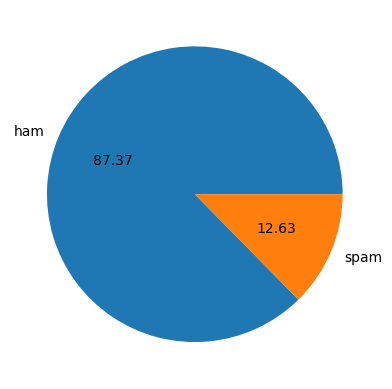

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
import nltk
print('nltk',nltk.__version__)

nltk 3.9.1


In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_char_count'] = df['message'].apply(len)

C:\Users\akayu\AppData\Local\Temp\ipykernel_4312\3095790481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char_count'] = df['message'].apply(len)


In [26]:
df

,target,message,num_char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)) )

C:\Users\akayu\AppData\Local\Temp\ipykernel_4312\82057558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)) )


In [28]:
df.head()

,target,message,num_char_count,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)) )

C:\Users\akayu\AppData\Local\Temp\ipykernel_4312\3410902406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)) )


In [30]:
df.head()

,target,message,num_char_count,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_char_count','num_words','num_sentences']].describe()


,num_char_count,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target']==0][['num_char_count','num_words','num_sentences']].describe()

,num_char_count,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target']==1][['num_char_count','num_words','num_sentences']].describe()

,num_char_count,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns 
print('seaborn',sns.__version__)

seaborn 0.13.2


[]

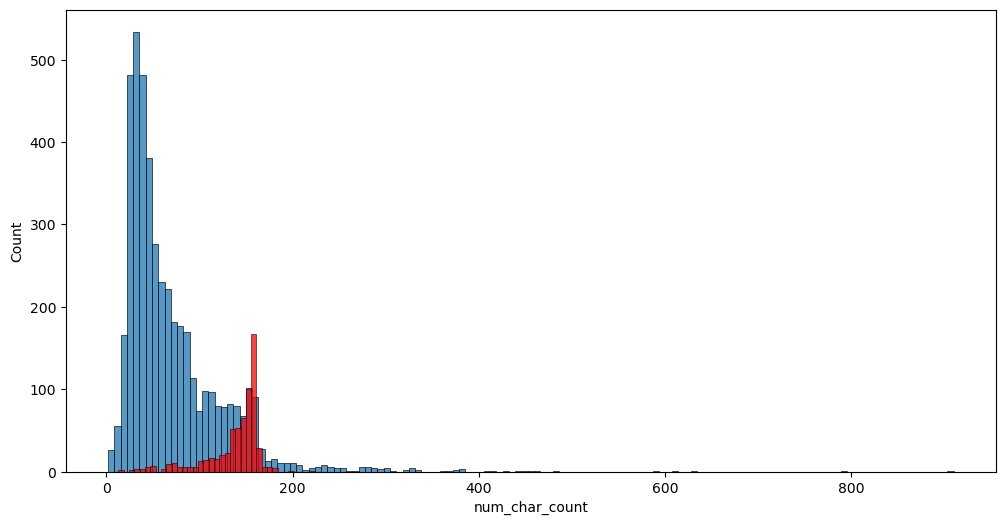

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char_count']) 
sns.histplot(df[df['target']==1]['num_char_count'],color='red') # spam

plt.plot()

[]

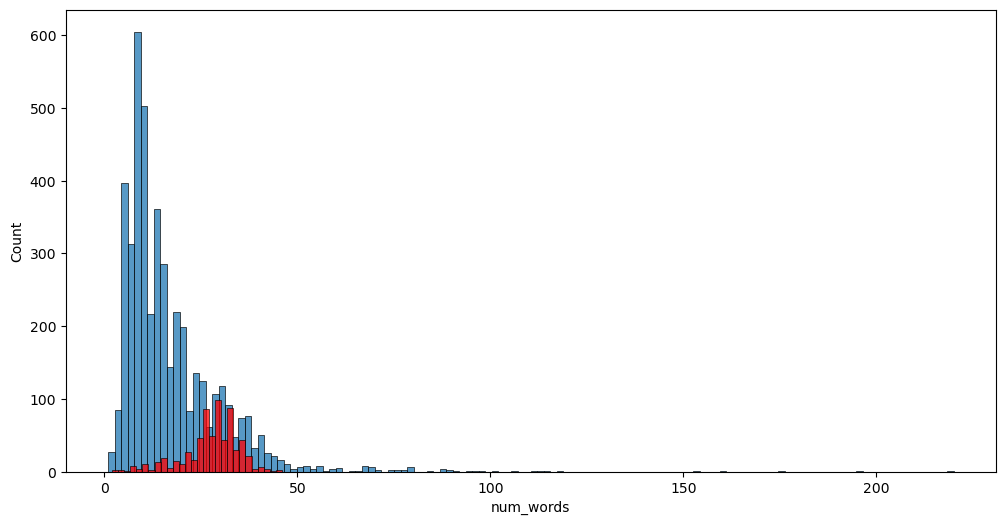

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red') # spam

plt.plot()

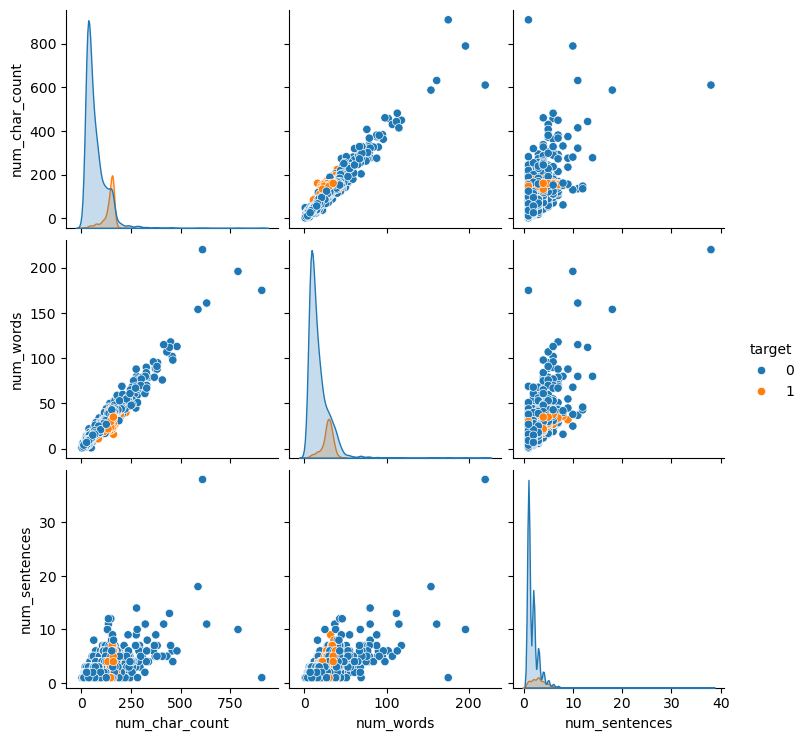

In [37]:
sns.pairplot(df,hue='target')


# Data Pre processing
 1.Lower Case
 2.Tokenization
 3.Removal special characters
 4.Removing Stop words and punctuation
 5.Stemming

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)   
    

In [39]:
import string


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# download required resources
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    words = [ps.stem(w) for w in tokens if w.isalnum() and w not in stopwords.words('english')]
    return " ".join(words)

print(transform_text('Hi Ayush! How are you?'))


hi ayush


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
transform_text('hi ayush! How  are You ?')

'hi ayush'

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akayu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
ps.stem('dancing')

'danc'

In [47]:
print(transform_text(df['message'][0]))
df['message'][0]

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
df['transformed_text'] = df['message'].apply(transform_text)

C:\Users\akayu\AppData\Local\Temp\ipykernel_4312\3273314684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['message'].apply(transform_text)


In [49]:
df

,target,message,num_char_count,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# work cloud

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

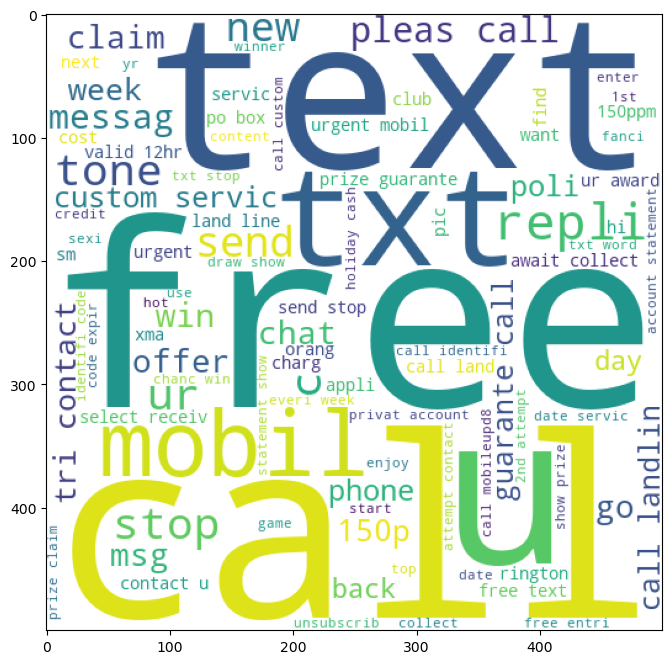

In [52]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

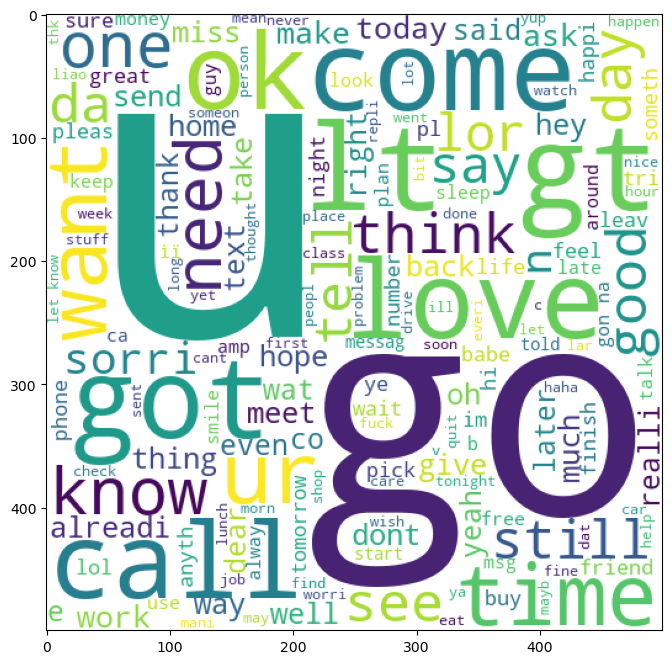

In [54]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

In [55]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
     for word in msg.split():
         spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
common_words

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


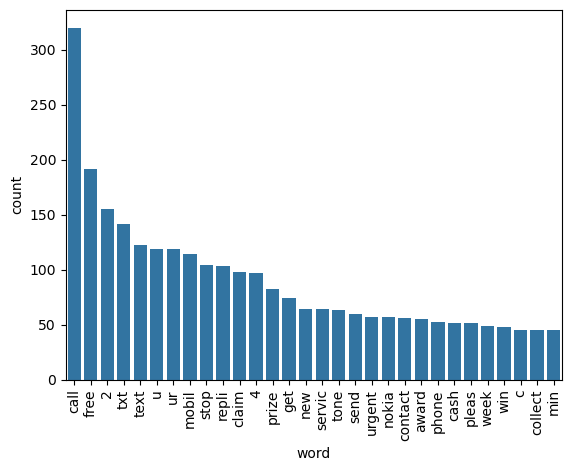

In [58]:
sns.barplot(x='word',y='count',data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
     for word in msg.split():
         ham_corpus.append(word)

In [60]:
from collections import Counter
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
common_words

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


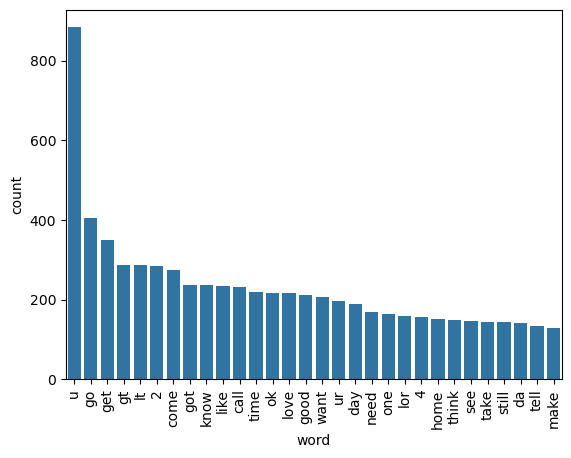

In [61]:
sns.barplot(x='word',y='count',data=common_words)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [63]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
X.shape

(5169, 6708)

In [66]:
y = df['target'].values

In [67]:
y.shape

(5169,)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)

y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [72]:
mnb.fit(X_train,y_train)

y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [73]:
bnb.fit(X_train,y_train)

y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [74]:
! pip install xgboost

In [75]:
# lets do it with all the classification model 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
lr = LogisticRegression()
svc = SVC()
mnb = MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


In [77]:
models = {
    'lr':lr,
    'svc':svc,
    'mnb':mnb,
    'knn':knn,
    'dtc':dtc,
    'rfc':rfc,
    'bc':bc,
    'etc':etc,
    'abc':abc,
    'gbc':gbc,
    'xgb':xgb
}

In [78]:
def train_classifier(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [79]:
train_classifier(lr,X_train,X_test,y_train,y_test)

(0.9477756286266924, 0.9883720930232558)

In [80]:
accuracy_scores=[]
precision_scores = []

for name,clf in models.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)

    print('For',name)
    print('accuracy',current_accuracy)
    print('precision',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For lr
accuracy 0.9477756286266924
precision 0.9883720930232558
For svc
accuracy 0.9661508704061895
precision 0.9813084112149533
For mnb
accuracy 0.9593810444874274
precision 1.0
For knn
accuracy 0.9003868471953579
precision 1.0
For dtc
accuracy 0.9516441005802708
precision 0.8142857142857143
For rfc
accuracy 0.971953578336557
precision 0.990990990990991
For bc
accuracy 0.960348162475822
precision 0.8818897637795275
For etc
accuracy 0.97678916827853
precision 0.975
For abc
accuracy 0.9245647969052224
precision 0.8409090909090909
For gbc
accuracy 0.960348162475822
precision 0.9217391304347826
For xgb
accuracy 0.9729206963249516
precision 0.9296875


In [81]:
performance_df = pd.DataFrame({'algorithm':models.keys(),'accuracy_score':accuracy_scores,'precision_score':precision_scores}).sort_values('precision_score',ascending=False)

In [82]:
performance_df

,algorithm,accuracy_score,precision_score
2,mnb,0.959381,1.000000
3,knn,0.900387,1.000000
5,rfc,0.971954,0.990991
0,lr,0.947776,0.988372
1,svc,0.966151,0.981308
7,etc,0.976789,0.975000
10,xgb,0.972921,0.929688
9,gbc,0.960348,0.921739
6,bc,0.960348,0.881890
8,abc,0.924565,0.840909


In [83]:
performance_df1 = pd.melt(performance_df,id_vars='algorithm')  # keep the id_vars as it is and melts the other columns to the variable and value

In [84]:
performance_df1

,algorithm,variable,value
0,mnb,accuracy_score,0.959381
1,knn,accuracy_score,0.900387
2,rfc,accuracy_score,0.971954
3,lr,accuracy_score,0.947776
4,svc,accuracy_score,0.966151
5,etc,accuracy_score,0.976789
6,xgb,accuracy_score,0.972921
7,gbc,accuracy_score,0.960348
8,bc,accuracy_score,0.960348
9,abc,accuracy_score,0.924565


[]

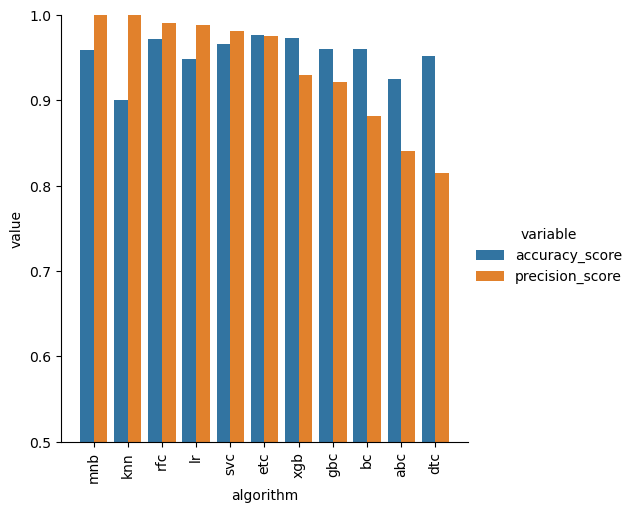

In [85]:
sns.catplot(x='algorithm',y='value',hue='variable',data= performance_df1,kind ='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.plot()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [87]:
# model improvement by using tfidf by making max_words limitation
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [88]:
models = {
    'lr':lr,
    'svc':svc,
    'mnb':mnb,
    'knn':knn,
    'dtc':dtc,
    'rfc':rfc,
    'bc':bc,
    'etc':etc,
    'abc':abc,
    'gbc':gbc,
    'xgb':xgb
}

In [89]:
def train_classifier(model,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [90]:
accuracy_scores=[]
precision_scores = []

for name,clf in models.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)

    print('For',name)
    print('accuracy',current_accuracy)
    print('precision',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For lr
accuracy 0.9516441005802708
precision 0.94
For svc
accuracy 0.9729206963249516
precision 0.9741379310344828
For mnb
accuracy 0.9593810444874274
precision 1.0
For knn
accuracy 0.9003868471953579
precision 1.0
For dtc
accuracy 0.9352030947775629
precision 0.8380952380952381
For rfc
accuracy 0.971953578336557
precision 1.0
For bc
accuracy 0.9584139264990329
precision 0.8625954198473282
For etc
accuracy 0.9729206963249516
precision 0.9824561403508771
For abc
accuracy 0.9245647969052224
precision 0.8409090909090909
For gbc
accuracy 0.9526112185686654
precision 0.9238095238095239
For xgb
accuracy 0.9748549323017408
precision 0.9516129032258065


In [91]:
temp_df = pd.DataFrame({'algorithm':models.keys(),'accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores}).sort_values('precision_max_ft_3000',ascending=False)

In [92]:
temp_df

,algorithm,accuracy_max_ft_3000,precision_max_ft_3000
2,mnb,0.959381,1.000000
5,rfc,0.971954,1.000000
3,knn,0.900387,1.000000
7,etc,0.972921,0.982456
1,svc,0.972921,0.974138
10,xgb,0.974855,0.951613
0,lr,0.951644,0.940000
9,gbc,0.952611,0.923810
6,bc,0.958414,0.862595
8,abc,0.924565,0.840909


In [93]:
temp_df1 = pd.melt(performance_df,id_vars='algorithm')  # keep the id_vars as it is and melts the other columns to the variable and value

In [94]:
temp_df1

,algorithm,variable,value
0,mnb,accuracy_score,0.959381
1,knn,accuracy_score,0.900387
2,rfc,accuracy_score,0.971954
3,lr,accuracy_score,0.947776
4,svc,accuracy_score,0.966151
5,etc,accuracy_score,0.976789
6,xgb,accuracy_score,0.972921
7,gbc,accuracy_score,0.960348
8,bc,accuracy_score,0.960348
9,abc,accuracy_score,0.924565


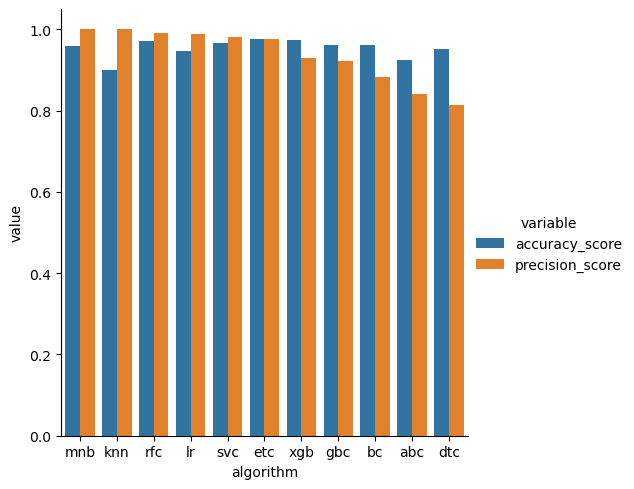

In [95]:
sns.catplot(x='algorithm',y='value',hue='variable',data=temp_df1,kind='bar')

In [96]:
 max_ft_3000 =performance_df.merge(temp_df,on='algorithm')

In [97]:
max_ft_3000

,algorithm,accuracy_score,precision_score,accuracy_max_ft_3000,precision_max_ft_3000
0,mnb,0.959381,1.000000,0.959381,1.000000
1,knn,0.900387,1.000000,0.900387,1.000000
2,rfc,0.971954,0.990991,0.971954,1.000000
3,lr,0.947776,0.988372,0.951644,0.940000
4,svc,0.966151,0.981308,0.972921,0.974138
5,etc,0.976789,0.975000,0.972921,0.982456
6,xgb,0.972921,0.929688,0.974855,0.951613
7,gbc,0.960348,0.921739,0.952611,0.923810
8,bc,0.960348,0.881890,0.958414,0.862595
9,abc,0.924565,0.840909,0.924565,0.840909


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [100]:
# model improvement by using tfidf by making max_words limitation
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [101]:
models = {
    'lr':lr,
    'svc':svc,
    'mnb':mnb,
    'knn':knn,
    'dtc':dtc,
    'rfc':rfc,
    'bc':bc,
    'etc':etc,
    'abc':abc,
    'gbc':gbc,
    'xgb':xgb
}

In [102]:
def train_classifier(model,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [103]:
accuracy_scores=[]
precision_scores = []

for name,clf in models.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)

    print('For',name)
    print('accuracy',current_accuracy)
    print('precision',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For lr
accuracy 0.9516441005802708
precision 0.94
For svc
accuracy 0.9729206963249516
precision 0.9741379310344828
For mnb
accuracy 0.9593810444874274
precision 1.0
For knn
accuracy 0.9003868471953579
precision 1.0
For dtc
accuracy 0.9352030947775629
precision 0.8380952380952381
For rfc
accuracy 0.971953578336557
precision 1.0
For bc
accuracy 0.9584139264990329
precision 0.8625954198473282
For etc
accuracy 0.9729206963249516
precision 0.9824561403508771
For abc
accuracy 0.9245647969052224
precision 0.8409090909090909
For gbc
accuracy 0.9526112185686654
precision 0.9238095238095239
For xgb
accuracy 0.9748549323017408
precision 0.9516129032258065


In [104]:
temp_df_scaling = pd.DataFrame({'algorithm':models.keys(),'accuracy_scaling':accuracy_scores,'precision_scaling':precision_scores}).sort_values('precision_scaling',ascending=False)

In [105]:
temp_df_scaling1 = pd.melt(performance_df,id_vars='algorithm')  # keep the id_vars as it is and melts the other columns to the variable and value

In [106]:
max_ft_3000.merge(temp_df_scaling,on = 'algorithm')

,algorithm,accuracy_score,precision_score,accuracy_max_ft_3000,precision_max_ft_3000,accuracy_scaling,precision_scaling
0,mnb,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
1,knn,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
2,rfc,0.971954,0.990991,0.971954,1.000000,0.971954,1.000000
3,lr,0.947776,0.988372,0.951644,0.940000,0.951644,0.940000
4,svc,0.966151,0.981308,0.972921,0.974138,0.972921,0.974138
5,etc,0.976789,0.975000,0.972921,0.982456,0.972921,0.982456
6,xgb,0.972921,0.929688,0.974855,0.951613,0.974855,0.951613
7,gbc,0.960348,0.921739,0.952611,0.923810,0.952611,0.923810
8,bc,0.960348,0.881890,0.958414,0.862595,0.958414,0.862595
9,abc,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909


In [107]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb= MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [108]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svc',svc),('mnb',mnb),('etc',etc)],voting='soft')

In [109]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [110]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))